In [184]:
import pandas as pd
from matplotlib import pyplot as plt
from Pipeline.AlgorithmResultParsers.DirecTagParser import DirecTagParser

In [7]:
pools = ['Pool_49', 'Pool_52', 'Pool_60']
algorithms = [('DeepNovo', 'deepnovo'), ('Novor', 'novor'), ('DirecTag', 'direcTag'), ('PEAKS', 'peaks')]

In [206]:
pools_direcTag = [
    ('Pool_49', 'Run_1/01640c_BA7-Thermo_SRM_Pool_49_01_01-3xHCD-1h-R2.tags'),
    ('Pool_52', 'Run_1/01640c_BD7-Thermo_SRM_Pool_52_01_01-3xHCD-1h-R2.tags'),
    ('Pool_60', 'Run_1/01640c_BD8-Thermo_SRM_Pool_60_01_01-3xHCD-1h-R2.tags')]

direcTag_adjusted_similarity = dict()
for p in pools_direcTag:
    # read and group the predicted tags
    direcTag_df = DirecTagParser(f"../../Data/AlgorithmResults/{p[0]}/DirecTag/{p[1]}", 25).parse()
    direcTag_df = direcTag_df.groupby("ID")["Predicted"].apply(list)

    # read and group the scored tags
    direcTag_scored_df = pd.read_csv(
        f"../../Data/ScoringResults/{p[0]}/directag_scored.tsv",
        sep="\t", header=0)
    direcTag_scored_df = direcTag_scored_df.groupby("ID")["Similarity"].apply(list)

    # calculate the percentage of correct tags per spectrum
    correctTag_percentage = list()

    for k, v in direcTag_df.items():
        if k in direcTag_scored_df:
            correctTag_percentage.append([k, sum([1 for i in direcTag_scored_df[k] if i == 1.0]) / len(v)])

    correctTag_percentage_2 = list()

    for k, v in direcTag_scored_df.items():
        correctTag_percentage_2.append([k, sum([1 for i in direcTag_scored_df[k] if i == 1.0]) / len(v)])

    print(len(correctTag_percentage))
    print(len(correctTag_percentage_2))
    #else:
     #   correctTag_percentage.append([k, 0])

    # create a dataframe and plot the distribution
    correctTag_percentage_df = pd.DataFrame(correctTag_percentage, columns=["ID", "Similarity"])
    direcTag_adjusted_similarity[p[0]] = correctTag_percentage_df

direcTag_adjusted_identity = dict()
for p in pools_direcTag:
    # read and group the predicted tags
    direcTag_df = DirecTagParser(f"../../Data/AlgorithmResults/{p[0]}/DirecTag/{p[1]}", 25).parse()
    direcTag_df = direcTag_df.groupby("ID")["Predicted"].apply(list)

    # read and group the scored tags
    direcTag_scored_df = pd.read_csv(
        f"../../Data/ScoringResults/{p[0]}/directag_scored.tsv",
        sep="\t", header=0)
    direcTag_scored_df = direcTag_scored_df.groupby("ID")["Identity"].apply(list)

    # calculate the percentage of correct tags per spectrum
    correctTag_percentage = list()

    for k, v in direcTag_scored_df.items():
        if k in direcTag_scored_df:
            correctTag_percentage.append([k, sum([1 for i in direcTag_scored_df[k] if i == 1.0]) / len(v)])
    #else:
     #   correctTag_percentage.append([k, 0])

    # create a dataframe and plot the distribution
    correctTag_percentage_df = pd.DataFrame(correctTag_percentage, columns=["ID", "Identity"])
    direcTag_adjusted_identity[p[0]] = correctTag_percentage_df

28782
28782
26282
26282
26168
26168


In [198]:
for k,v in direcTag_adjusted_identity.items():
    print(k)
    print(v.describe(), '\n\n')

for k,v in direcTag_adjusted_similarity.items():
    print(k)
    print(v.describe(), '\n\n')

Pool_49
                 ID      Identity
count  28782.000000  28782.000000
mean   22357.536551      0.249004
std    13097.398665      0.250602
min       96.000000      0.000000
25%    10956.250000      0.000000
50%    21561.500000      0.200000
75%    32840.750000      0.400000
max    50084.000000      1.000000 


Pool_52
                 ID      Identity
count  26282.000000  26282.000000
mean   23007.181683      0.212118
std    12551.150204      0.234001
min        7.000000      0.000000
25%    12308.250000      0.000000
50%    22794.500000      0.125000
75%    33297.750000      0.333333
max    48918.000000      1.000000 


Pool_60
                 ID      Identity
count  26168.000000  26168.000000
mean   22115.034049      0.224908
std    12697.843152      0.234960
min      266.000000      0.000000
25%    11491.750000      0.000000
50%    21625.500000      0.200000
75%    32178.750000      0.400000
max    49400.000000      1.000000 


Pool_49
                 ID    Similarity
count  

## Number of peptides in each pool compared to the number of identifiable peptides compared to the number of predicted peptides compared to the number of predicted and identified peptides

In [42]:
for alg, algFile in algorithms:
    entries = []
    for pool in pools:
        # Load the data
        raw_data =pd.read_csv(
                f"../../Data/Datasets/{pool}/Thermo_SRM_{pool}_01_01_3xHCD-1h-R2-tryptic/msmsScans.txt",
                sep='\t', index_col=None)
        parsed_data = pd.read_csv(f'../../Data/ParsingResults/{pool}/{algFile}_results_raw.tsv', sep='\t', index_col=None)
        scored_data = pd.read_csv(f'../../Data/ParsingResults/{pool}/{algFile}_results.tsv', sep='\t', index_col=None)

        # Get the number of peptides
        numPeptides = raw_data.shape[0]

        # Get the number of identifiable peptides
        numIdentifiable = raw_data.query('Identified == \'+\'').shape[0]

        if alg == 'DirecTag':
            # Get the number of predicted peptides
            numPredicted = parsed_data['ID'].nunique()
        else:
            # Get the number of predicted peptides
            numPredicted = parsed_data.shape[0]

        if alg == 'DirecTag':
            # Get the number of predicted peptides
            numPredictedIdentified = scored_data['ID'].nunique()
        else:
            # Get the number of predicted peptides
            numPredictedIdentified = scored_data.shape[0]


        entries.append([pool, numPeptides, numIdentifiable, numPredicted, numPredictedIdentified])
    data_df = pd.DataFrame(entries, columns=['Pool', 'Total', 'Identifiable', 'Predicted', 'Predicted and Identified'])
    print(f"{alg} - absolute",'\n', data_df, '\n\n')
    # turn the data into percentages
    data_df['Identifiable'] = data_df['Identifiable'] / data_df['Total'] * 100
    data_df['Predicted'] = data_df['Predicted'] / data_df['Total'] * 100
    data_df['Predicted and Identified'] = data_df['Predicted and Identified'] / data_df['Total'] * 100
    data_df['Total'] = 100
    print(f"{alg} - relative",'\n', data_df, '\n\n')

    # calculate average of percentages
    avg_identifiable = data_df['Identifiable'].mean()
    avg_predicted = data_df['Predicted'].mean()
    avg_predicted_identified = data_df['Predicted and Identified'].mean()
    print(f"{alg} - average", '\n', avg_identifiable, avg_predicted, avg_predicted_identified, '\n\n')




DeepNovo - absolute 
       Pool  Total  Identifiable  Predicted  Predicted and Identified
0  Pool_49  50154         33910      43014                     30256
1  Pool_52  49044         31605      42127                     27962
2  Pool_60  49461         31502      34608                     24707 


DeepNovo - relative 
       Pool  Total  Identifiable  Predicted  Predicted and Identified
0  Pool_49    100     67.611756  85.763847                 60.326195
1  Pool_52    100     64.442134  85.896338                 57.014110
2  Pool_60    100     63.690585  69.970280                 49.952488 


DeepNovo - average 
 65.24815796246783 80.54348831554103 55.76426430535957 


Novor - absolute 
       Pool  Total  Identifiable  Predicted  Predicted and Identified
0  Pool_49  50154         33910      50115                     33877
1  Pool_52  49044         31605      49026                     31591
2  Pool_60  49461         31502      49452                     31499 


Novor - relative 
    

## Boxplot of the percent identity score

DeepNovo:
      Pool  Median Identity  Median Similarity
0  Pool_49         0.636364           0.833333
1  Pool_52         0.666667           0.888889
2  Pool_60         0.750000           1.000000
Novor:
      Pool  Median Identity  Median Similarity
0  Pool_49         0.818182           0.923077
1  Pool_52         0.818182           0.928571
2  Pool_60         0.833333           1.000000
DirecTag:
      Pool  Median Identity  Median Similarity
0  Pool_49            0.200                0.5
1  Pool_52            0.125                0.5
2  Pool_60            0.200                0.5
PEAKS:
      Pool  Median Identity  Median Similarity
0  Pool_49         0.857143                1.0
1  Pool_52         0.857143                1.0
2  Pool_60         0.875000                1.0


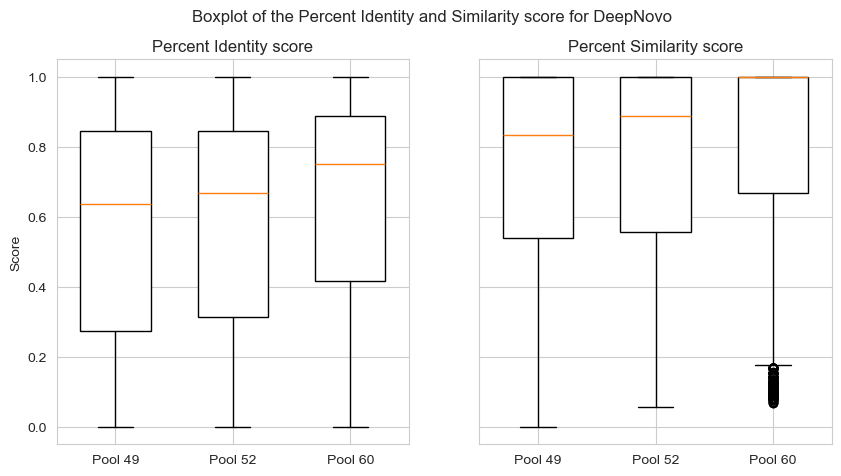

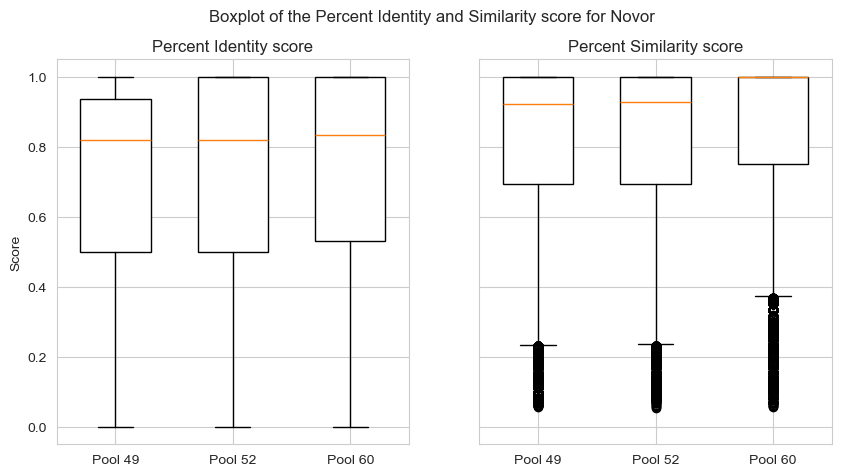

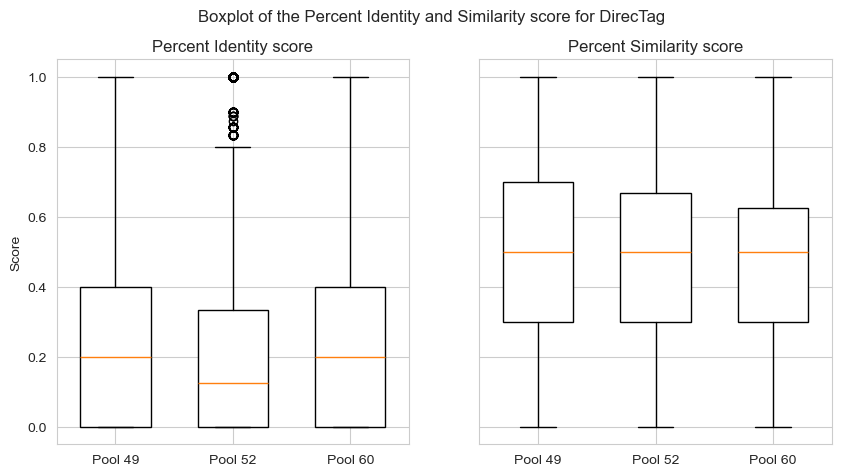

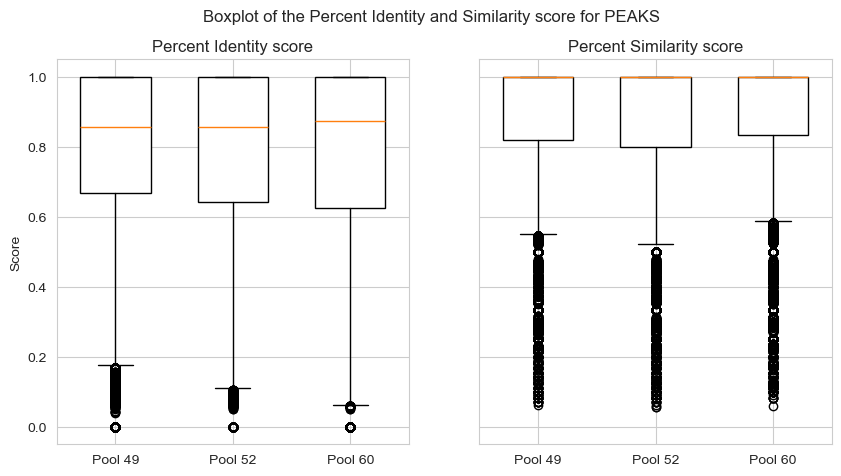

In [199]:
for alg, algFile in algorithms:


    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
    fig.set_size_inches(10, 5)
    median_id=dict()
    for pool in pools:
        # Load the data
        if alg == 'DirecTag':
            scored_data = direcTag_adjusted_identity[pool]
        else:
            scored_data = pd.read_csv(f'../../Data/ScoringResults/{pool}/{algFile}_scored.tsv', sep='\t', index_col=0)

        # print boxplot of the identity score
        ax[0].boxplot(scored_data['Identity'], positions=[pools.index(pool)], widths=0.6, patch_artist=True, boxprops=dict(facecolor='white'))
        median_id[pool] = scored_data['Identity'].median()

    ax[0].set_xticks(range(len(pools)))
    ax[0].set_title(f'Percent Identity score')
    ax[0].set_ylabel('Score')
    ax[0].set_xticklabels([' '.join(x.split('_')) for x in pools])
    median_sim=dict()
    for pool in pools:
        # Load the data
        if alg == 'DirecTag':
            scored_data = direcTag_adjusted_similarity[pool]
        else:
            scored_data = pd.read_csv(f'../../Data/ScoringResults/{pool}/{algFile}_scored.tsv', sep='\t', index_col=0)

        # print boxplot of the identity score
        ax[1].boxplot(scored_data['Similarity'], positions=[pools.index(pool)], widths=0.6, patch_artist=True, boxprops=dict(facecolor='white'))
        median_sim[pool] = scored_data['Similarity'].median()

    ax[1].set_xticks(range(len(pools)))
    ax[1].set_title(f'Percent Similarity score')
    ax[1].set_xticklabels([' '.join(x.split('_')) for x in pools])

    print(alg+":")
    print(pd.DataFrame({'Pool':median_id.keys() ,'Median Identity': median_id.values(), 'Median Similarity': median_sim.values()}))
    # fig.tight_layout()
    fig.suptitle(f'Boxplot of the Percent Identity and Similarity score for {alg}')
    fig.savefig(f'../../Data/Analysis/{algFile}_all_pools_boxplot_identity_similarity.png')


## Shared histogram of the identity and similarity score

DeepNovo:
      Pool  Count  Identity 100  Similarity 100  Absolute Prediciton Increase
0  Pool_49  30256          3589           10896                          7307
1  Pool_52  27962          2657           11688                          9031
2  Pool_60  24707          4186           13072                          8886
      Pool  Count  Identity 100  Similarity 100  Prediciton Increase in %
0  Pool_49  30256      0.118621        0.360127                  3.035943
1  Pool_52  27962      0.095022        0.417996                  4.398946
2  Pool_60  24707      0.169426        0.529081                  3.122790



Novor:
      Pool  Count  Identity 100  Similarity 100  Absolute Prediciton Increase
0  Pool_49  33877          8250           15629                          7379
1  Pool_52  31591          8848           15252                          6404
2  Pool_60  31499          8807           16865                          8058
      Pool  Count  Identity 100  Similarity 100  Prediciton 

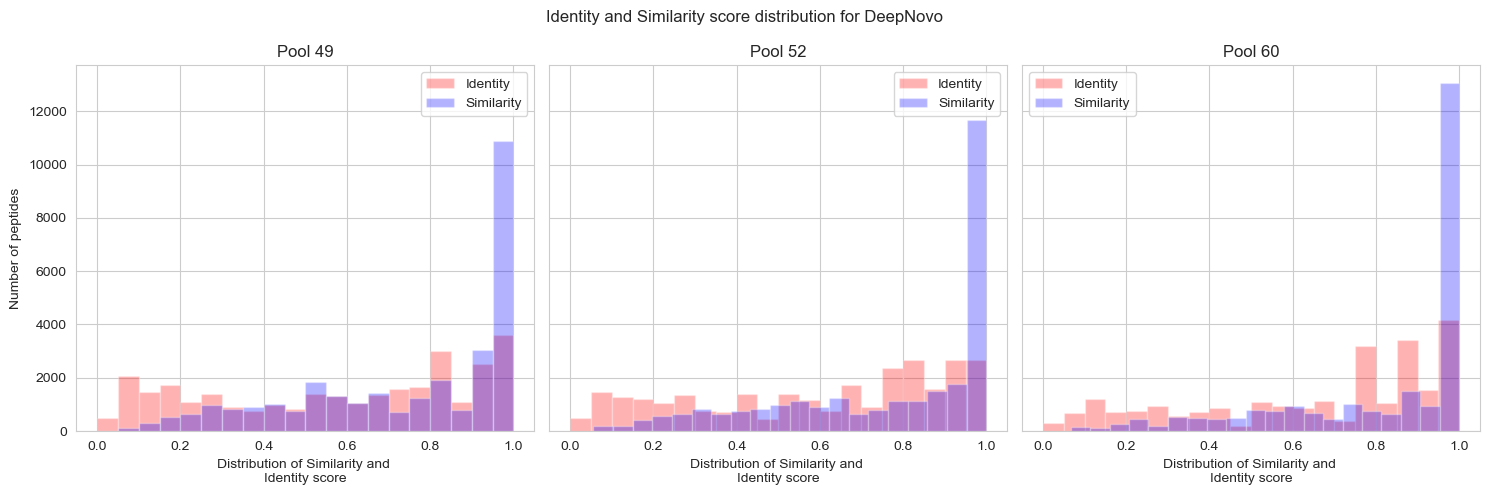

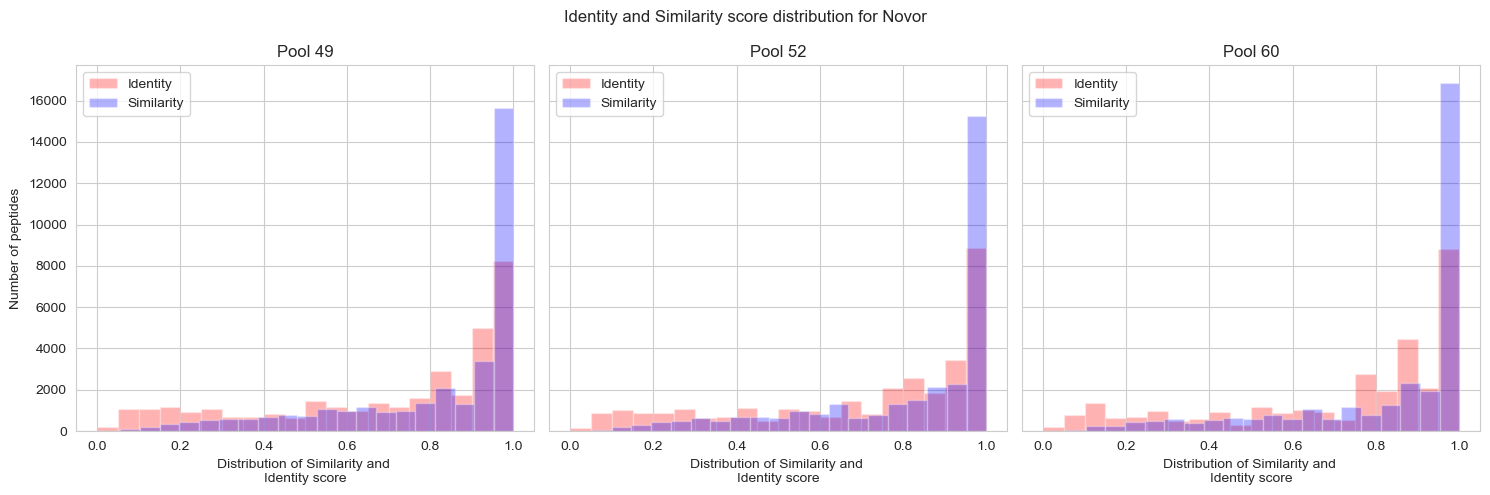

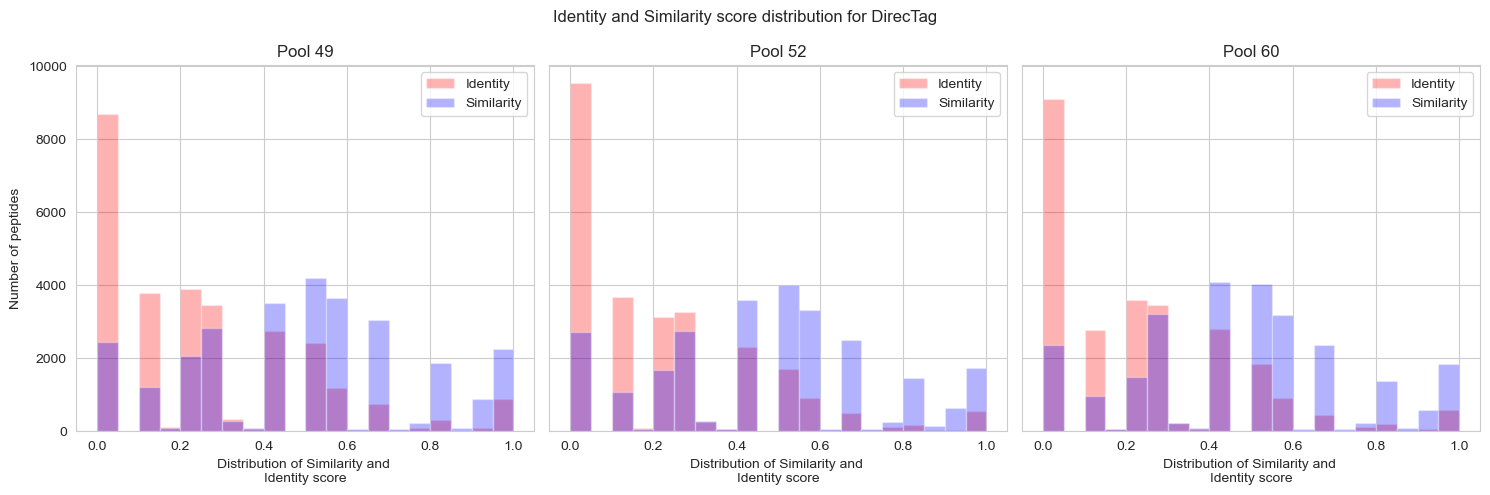

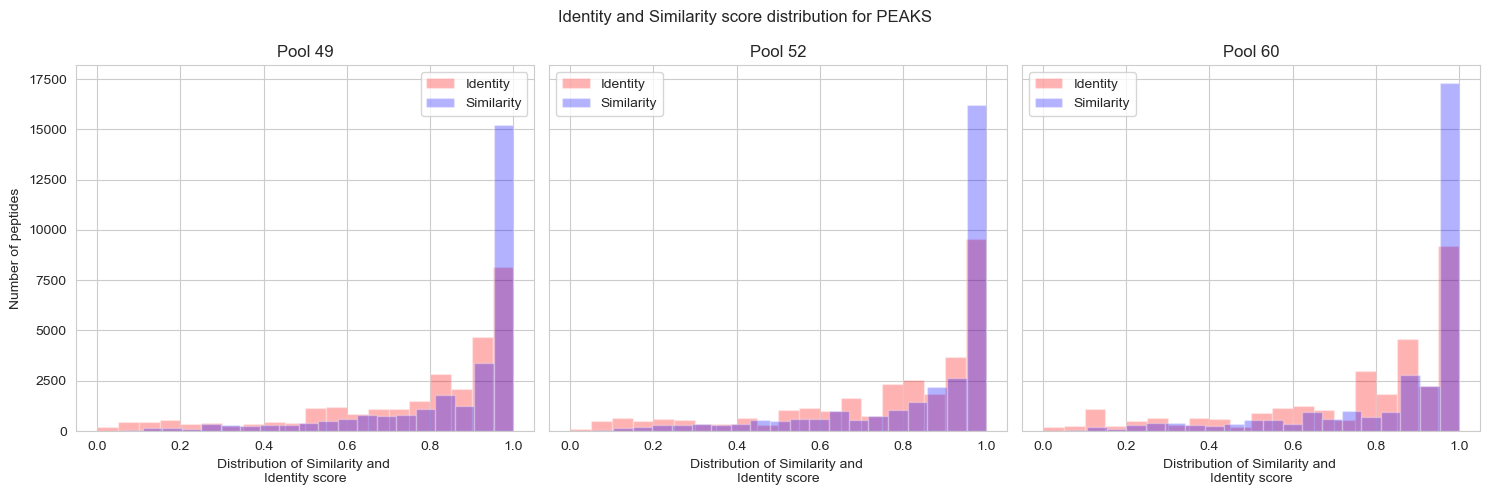

In [200]:
for alg, algFile in algorithms:
    fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True)
    fig.suptitle(f'Identity and Similarity score distribution for {alg}')
    fig.set_size_inches(15, 5)
    col = 0
    count = dict()
    id_100 = dict()
    sim_100 = dict()
    for pool, color in zip(pools, ['r', 'b', 'g']):
       # Load the data
        if alg == 'DirecTag':
            scored_data = direcTag_adjusted_identity[pool]
        else:
            scored_data = pd.read_csv(f'../../Data/ScoringResults/{pool}/{algFile}_scored.tsv', sep='\t', index_col=0)

        count[pool] = scored_data.shape[0]
        # print histogram of the identity score
        ax[col].hist(scored_data['Identity'], bins=20, alpha=0.3,color='r', label='Identity')
        id_100[pool] = scored_data.query('Identity == 1.0').shape[0]

        if alg == 'DirecTag':
            scored_data = direcTag_adjusted_similarity[pool]

        # print histogram of the similarity score
        ax[col].hist(scored_data['Similarity'], bins=20, alpha=0.3,color='b', label='Similarity')
        sim_100[pool] = scored_data.query('Similarity == 1.0').shape[0]
        # set xlabel
        ax[col].set_xlabel('Distribution of Similarity and \nIdentity score')
        if col == 0:
            ax[col].set_ylabel('Number of peptides')
        # create a legend
        ax[col].legend()

        # set the title of the subplot to the pool name
        ax[col].set_title(f"{' '.join(pool.split('_'))}")

        col += 1

    print(alg+":")
    alg_total_pred =  pd.DataFrame({'Pool':count.keys() ,'Count': count.values(), 'Identity 100': id_100.values(), 'Similarity 100': sim_100.values(), 'Absolute Prediciton Increase': [x-y for x,y in zip(sim_100.values(), id_100.values())]})
    print(alg_total_pred)
    alg_percent_pred = pd.DataFrame({'Pool':count.keys() ,'Count': count.values(), 'Identity 100': id_100.values(), 'Similarity 100': sim_100.values(), 'Prediciton Increase in %': [x/y for x,y in zip(sim_100.values(), id_100.values())]})
    alg_percent_pred['Identity 100'] = alg_percent_pred['Identity 100'] / alg_percent_pred['Count']
    alg_percent_pred['Similarity 100'] = alg_percent_pred['Similarity 100'] / alg_percent_pred['Count']
    print(alg_percent_pred)
    print('\n\n')
    # save the figure
    fig.tight_layout()
    fig.savefig(f'../../Data/Analysis/{algFile}_all_pools_identity_similarity.png')

## Shared histogram of the normalized local and global alignment score

DeepNovo:
      Pool  Total  Local = Global
0  Pool_49  30256           12335
1  Pool_52  27962           13021
2  Pool_60  24707           14225
Novor:
      Pool  Total  Local = Global
0  Pool_49  33877           17036
1  Pool_52  31591           16750
2  Pool_60  31499           18048
DirecTag:
      Pool   Total  Local = Global
0  Pool_49  251849               0
1  Pool_52  230256               0
2  Pool_60  231499               0
PEAKS:
      Pool  Total  Local = Global
0  Pool_49  28481           16324
1  Pool_52  30035           17281
2  Pool_60  30360           18395


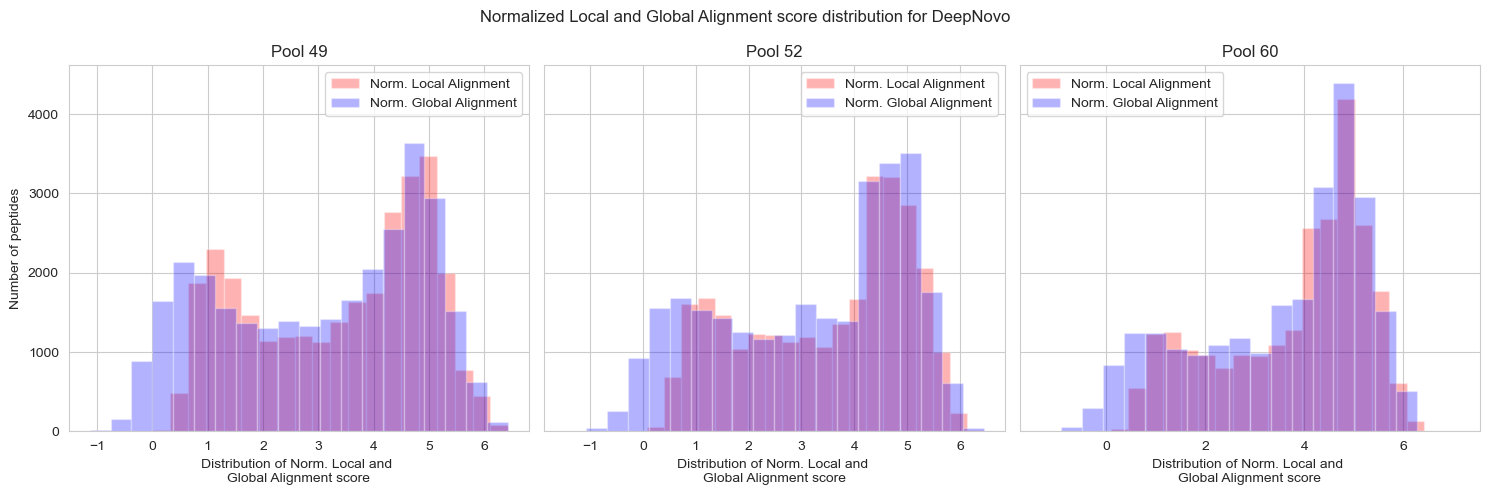

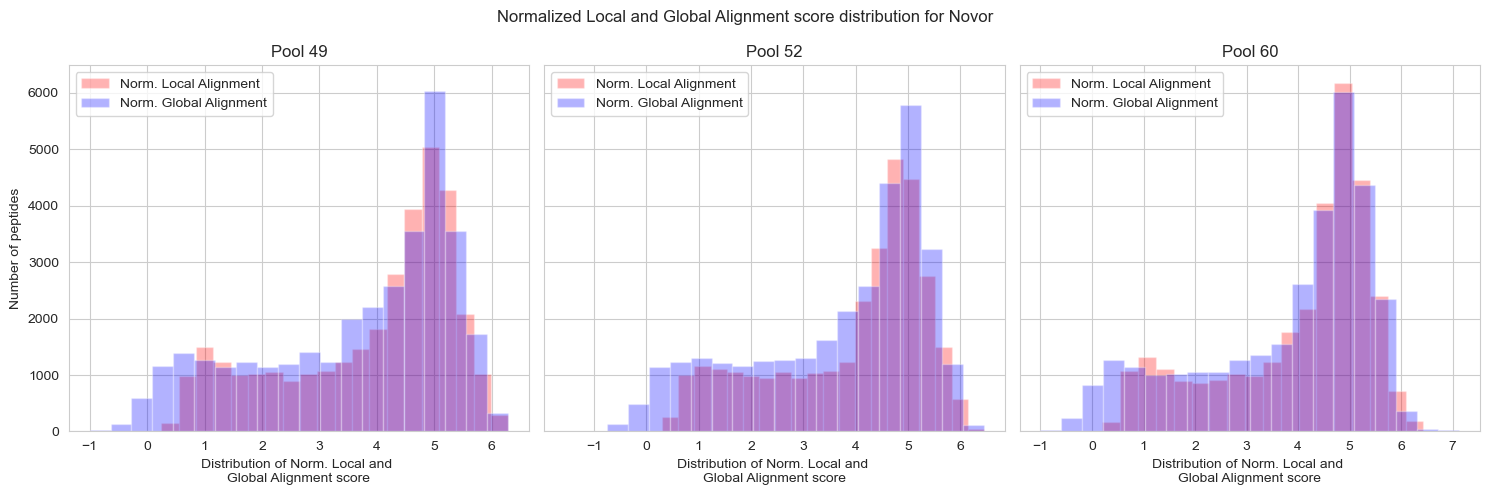

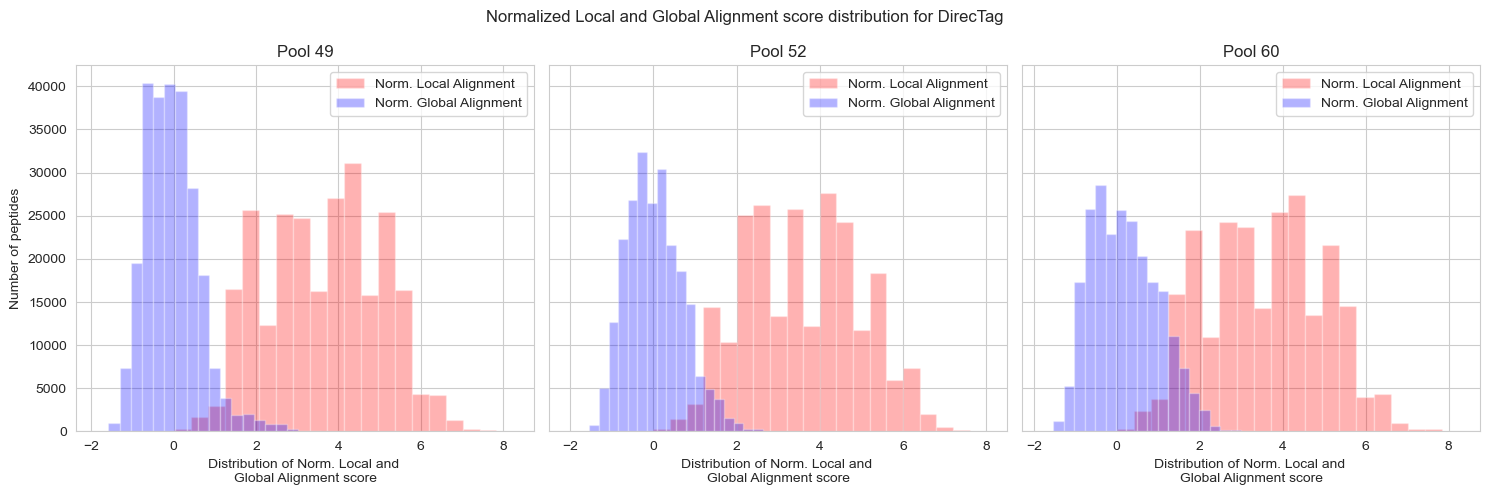

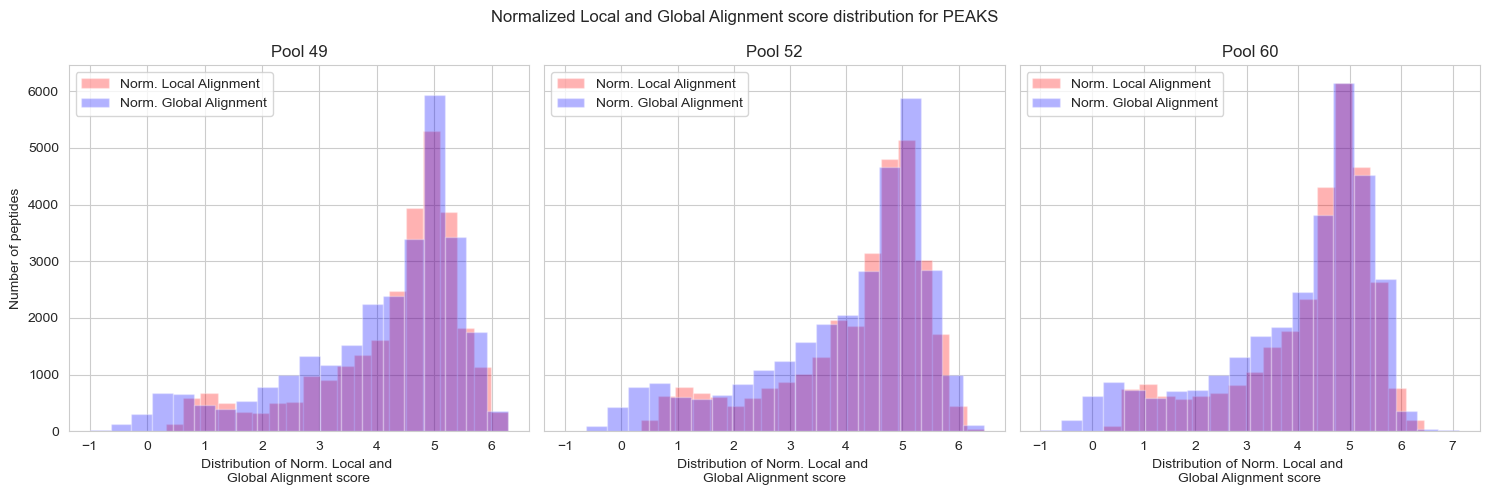

In [181]:
for alg, algFile in algorithms:
    fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True)
    fig.suptitle(f'Normalized Local and Global Alignment score distribution for {alg}')
    fig.set_size_inches(15, 5)
    col = 0
    local_eq_global = dict()
    total_dict = dict()
    for pool, color in zip(pools, ['r', 'b', 'g']):
        # Load the data
        scored_data = pd.read_csv(f'../../Data/ScoringResults/{pool}/{algFile}_scored.tsv', sep='\t', index_col=0)
        total_dict[pool] = scored_data.shape[0]
        # create a histogram for the local alignment score
        ax[col].hist(scored_data['Normalized Local Alignment'], bins=20, alpha=0.3,color='r', label='Norm. Local Alignment')

        # create a histogram for the global alignment score
        ax[col].hist(scored_data['Normalized Global Alignment'], bins=20, alpha=0.3,color='b', label='Norm. Global Alignment')
        local_eq_global[pool] = scored_data.query('`Normalized Local Alignment` == `Normalized Global Alignment`').shape[0]
        # set xlabel
        ax[col].set_xlabel('Distribution of Norm. Local and \nGlobal Alignment score')

        # only set ylabel for the first plot since they are shared
        if col == 0:
            ax[col].set_ylabel('Number of peptides')

        # create a legend
        ax[col].legend()

        # set the title of the subplot to the pool name
        ax[col].set_title(f"{' '.join(pool.split('_'))}")
        col += 1

    print(alg+":")
    print(pd.DataFrame({'Pool':local_eq_global.keys(), 'Total':total_dict.values() ,'Local = Global': local_eq_global.values()}))
    # save the figure
    fig.tight_layout()
    fig.savefig(f'../../Data/Analysis/{algFile}_all_pools_norm_local_global_alignment.png')

## Histogram of Levenshtein distance across all pools

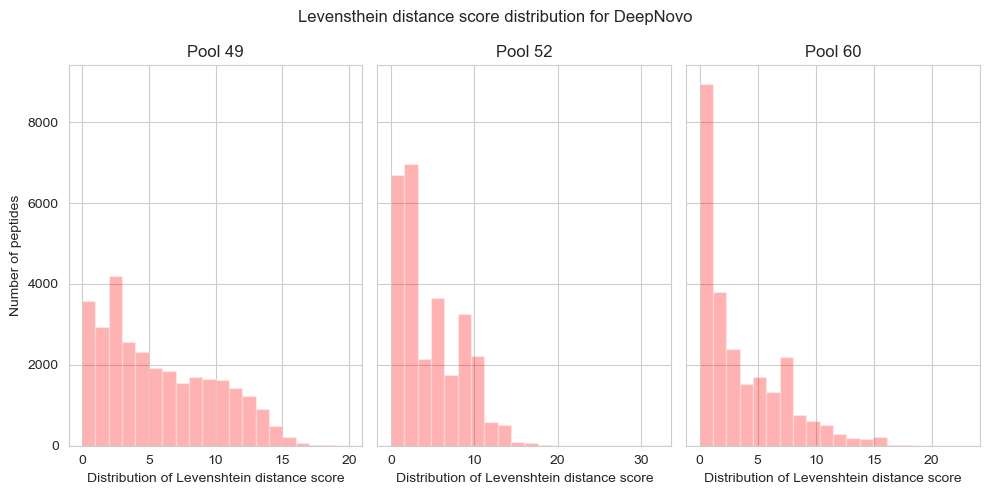

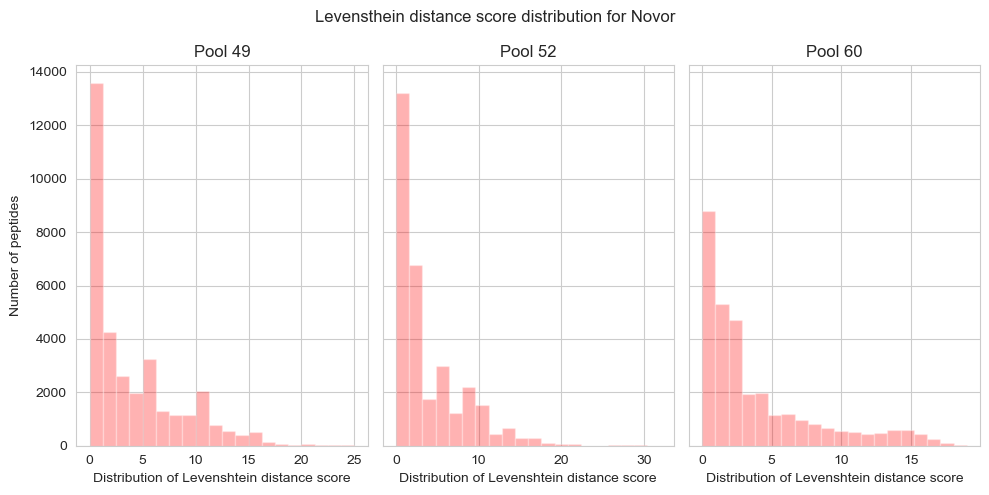

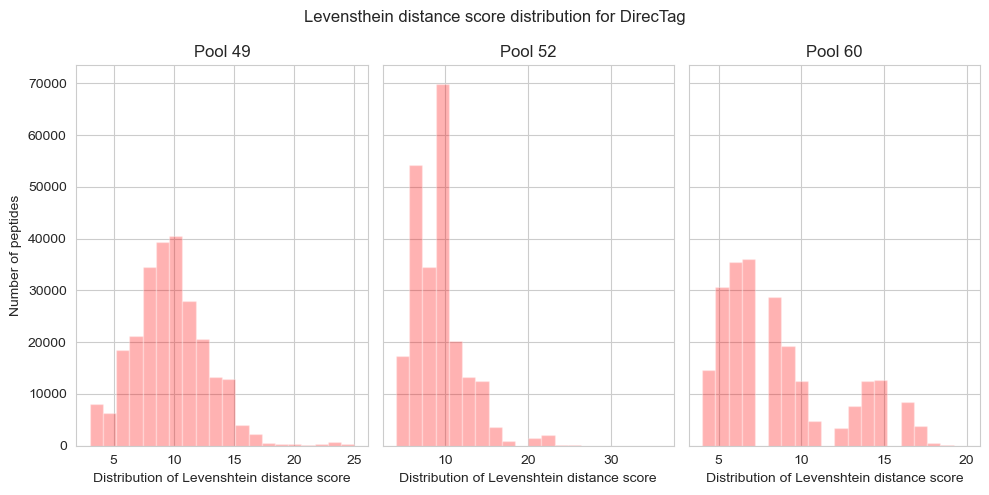

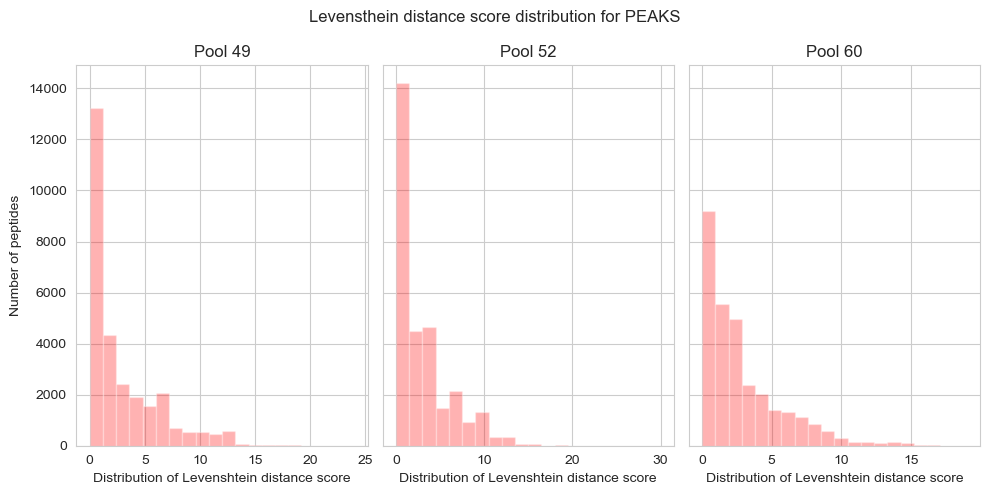

In [161]:
for alg, algFile in algorithms:
    fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True)
    fig.suptitle(f'Levensthein distance score distribution for {alg}')
    fig.set_size_inches(10, 5)
    col = 0
    for pool, color in zip(pools, ['r', 'b', 'g']):
        # Load the data
        scored_data = pd.read_csv(f'../../Data/ScoringResults/{pool}/{algFile}_scored.tsv', sep='\t', index_col=0)

        # create a histogram for the local alignment score
        ax[col].box(scored_data['Levenshtein'], alpha=0.3, color='r', label=' '.join(pool.split('_')), bins=20)

        # set xlabel
        ax[col].set_xlabel('Distribution of Levenshtein distance score')

        # only set ylabel for the first plot since they are shared
        if col == 0:
            ax[col].set_ylabel('Number of peptides')

        # create a legend
        ax[col].set_title(f"{' '.join(pool.split('_'))}")

        col += 1

    # save the figure
    fig.tight_layout()
    #fig.savefig(f'../../Data/Analysis/{algFile}_all_pools_levenshtein.png')

## Boxplot of the Levenshtein distance

DeepNovo:
      Pool  Min   Q1  Median   Q3  Max
0  Pool_49    0  2.0     4.0  9.0   20
1  Pool_52    0  2.0     4.0  7.0   32
2  Pool_60    0  1.0     2.0  6.0   23
Novor:
      Pool  Min   Q1  Median   Q3  Max
0  Pool_49    0  1.0     2.0  6.0   25
1  Pool_52    0  0.0     2.0  6.0   32
2  Pool_60    0  0.0     2.0  5.0   19
DirecTag:
      Pool  Min   Q1  Median    Q3  Max
0  Pool_49    3  8.0     9.0  11.0   25
1  Pool_52    4  7.0     9.0  10.0   36
2  Pool_60    4  6.0     7.0  10.0   20
PEAKS:
      Pool  Min   Q1  Median   Q3  Max
0  Pool_49    0  0.0     2.0  4.0   24
1  Pool_52    0  0.0     2.0  4.0   30
2  Pool_60    0  0.0     2.0  4.0   19


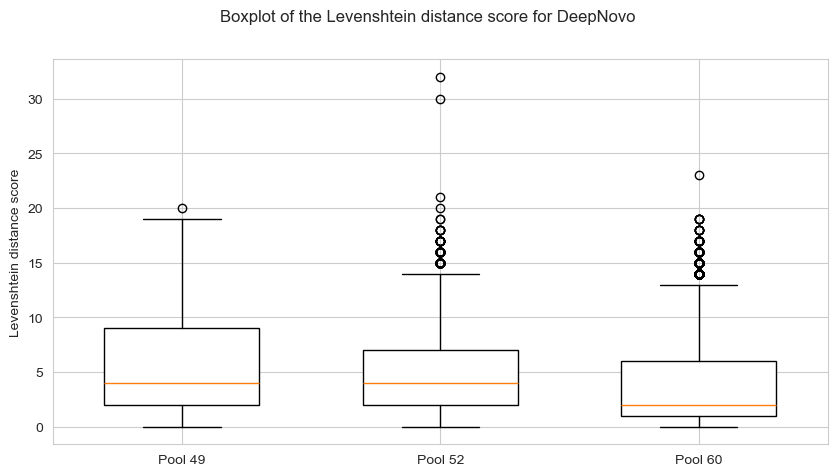

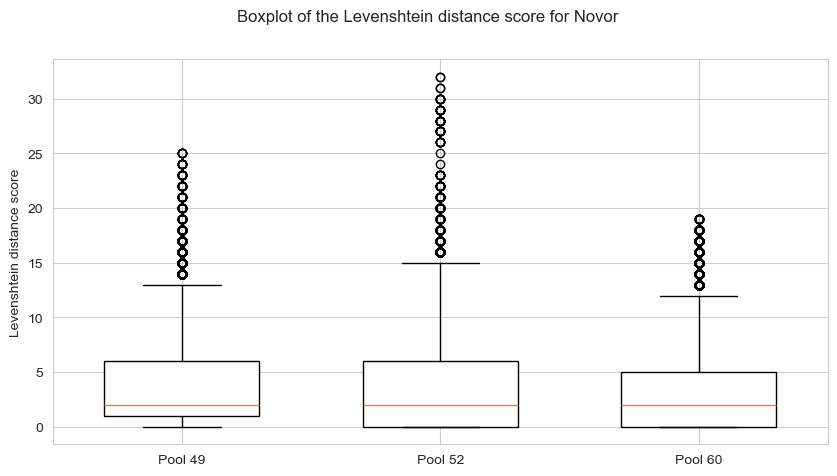

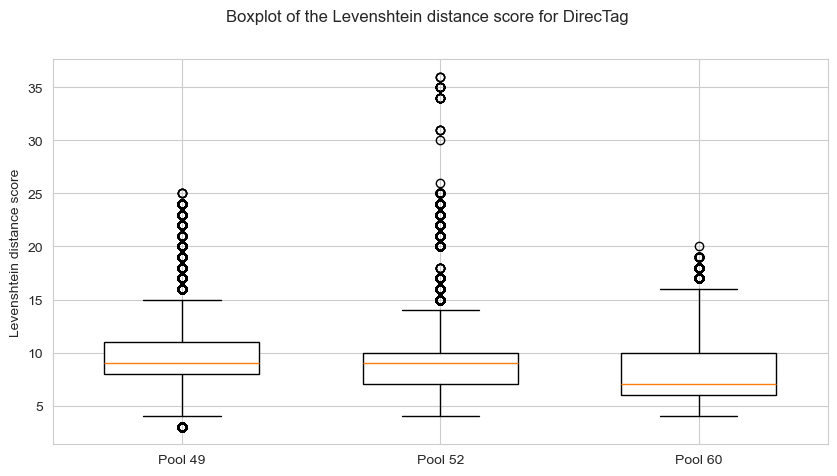

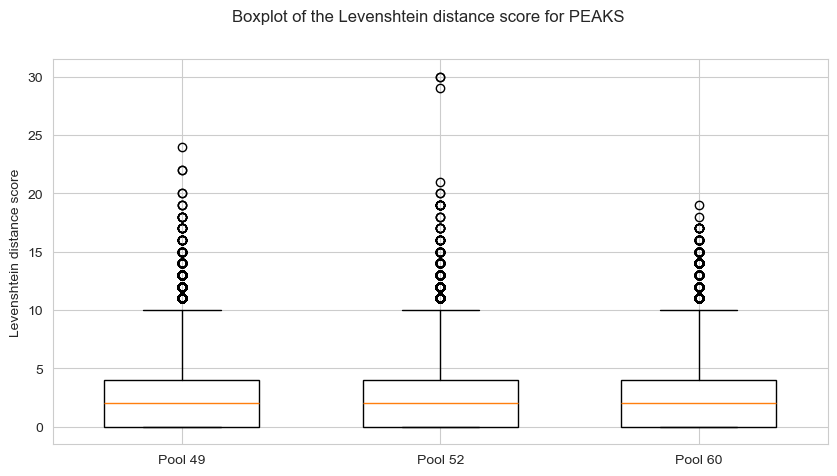

In [169]:
for alg, algFile in algorithms:


    fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True)
    fig.set_size_inches(10, 5)
    min_dict=dict()
    median_dict=dict()
    q1_dict=dict()
    q3_dict=dict()
    max_dict=dict()
    for pool in pools:
        # Load the data
        scored_data = pd.read_csv(f'../../Data/ScoringResults/{pool}/{algFile}_scored.tsv', sep='\t', index_col=0)

        # print boxplot of the identity score
        ax.boxplot(scored_data['Levenshtein'], positions=[pools.index(pool)], widths=0.6, patch_artist=True, boxprops=dict(facecolor='white'))
        median_dict[pool] = scored_data['Levenshtein'].median()
        q1_dict[pool] = scored_data['Levenshtein'].quantile(0.25)
        q3_dict[pool] = scored_data['Levenshtein'].quantile(0.75)
        max_dict[pool] = scored_data['Levenshtein'].max()
        min_dict[pool] = scored_data['Levenshtein'].min()

    ax.set_xticks(range(len(pools)))
    ax.set_ylabel('Levenshtein distance score')
    ax.set_xticklabels([' '.join(x.split('_')) for x in pools])
    print(alg+":")
    print(pd.DataFrame({'Pool':median_dict.keys(), 'Min':min_dict.values() , 'Q1': q1_dict.values(), 'Median': median_dict.values(), 'Q3': q3_dict.values(), 'Max': max_dict.values()}))
    # fig.tight_layout()
    fig.suptitle(f'Boxplot of the Levenshtein distance score for {alg}')
    fig.savefig(f'../../Data/Analysis/{algFile}_all_pools_boxplot_levenshtein.png')


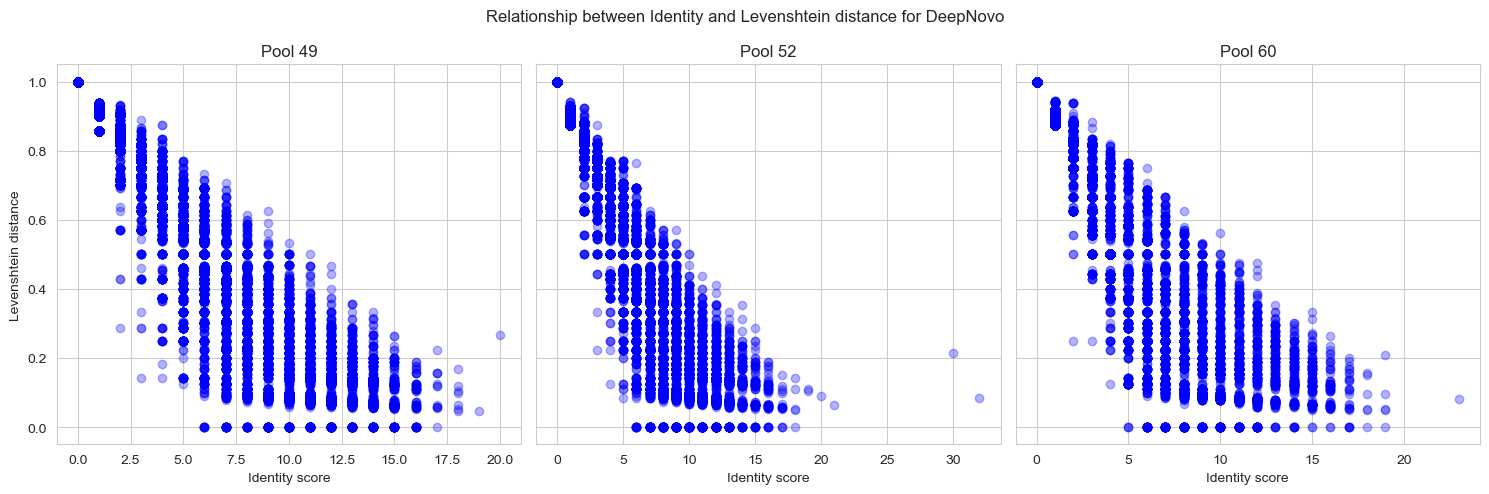

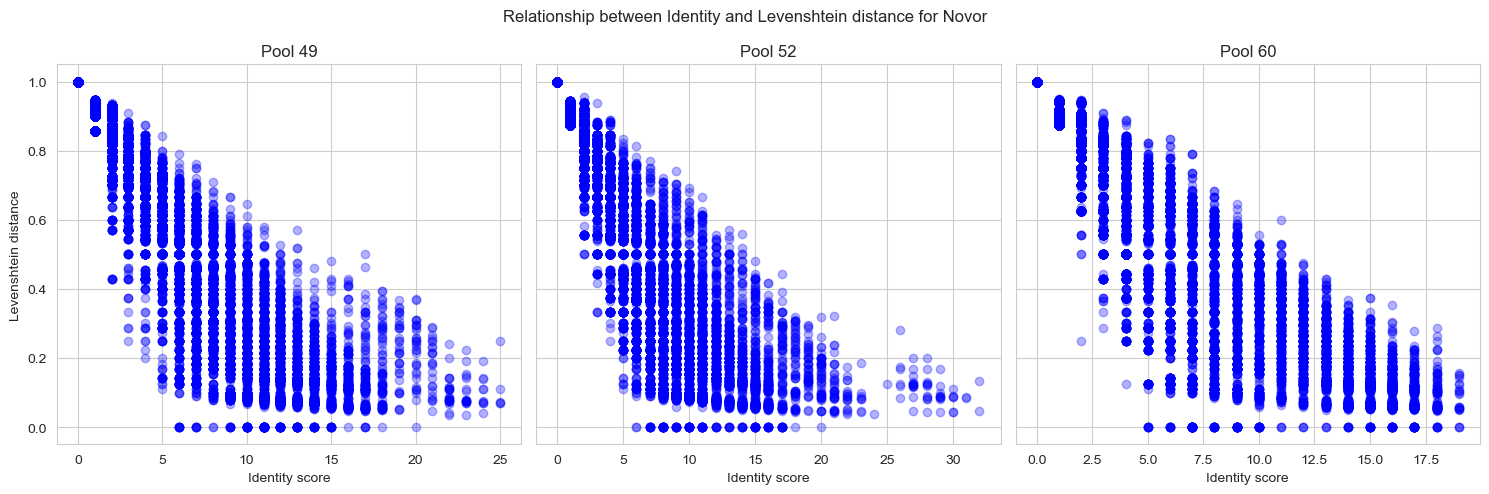

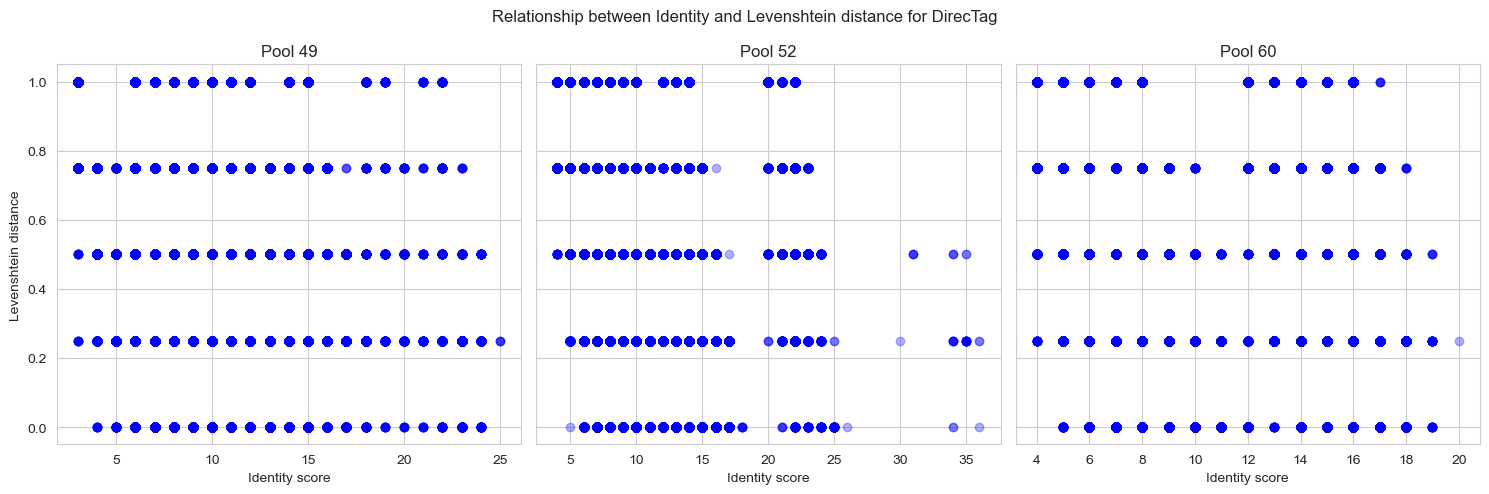

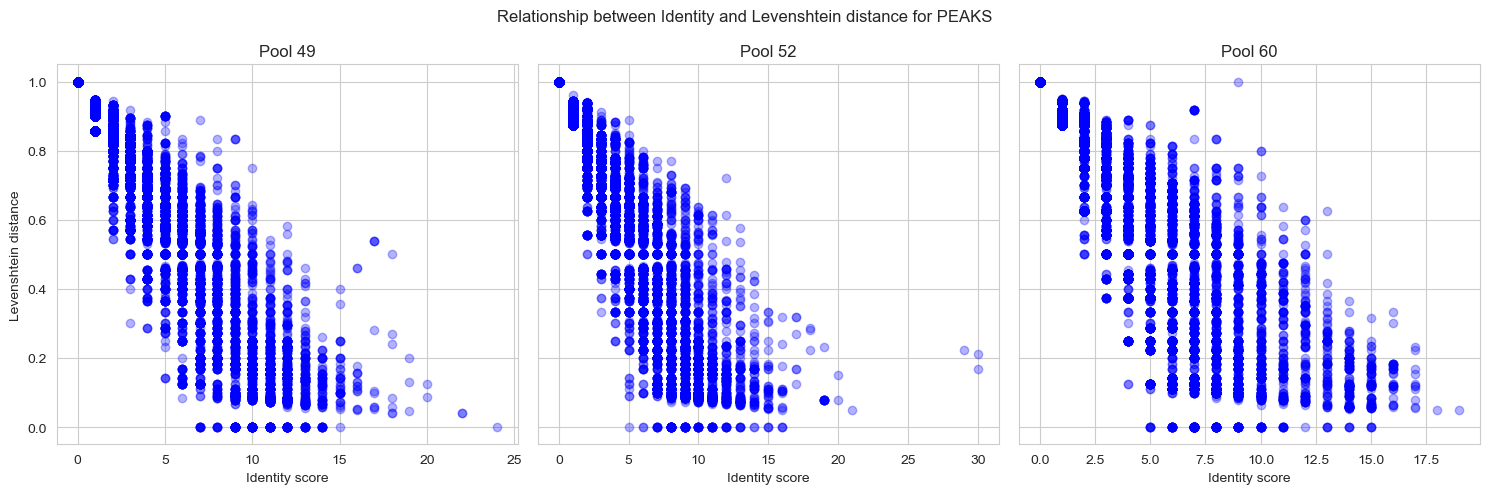

In [203]:
for alg, algFile in algorithms:
    fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True)
    fig.suptitle(f'Relationship between Identity and Levenshtein distance for {alg}')
    fig.set_size_inches(15, 5)
    col = 0
    for pool, color in zip(pools, ['r', 'b', 'g']):
        # Load the data
        scored_data = pd.read_csv(f'../../Data/ScoringResults/{pool}/{algFile}_scored.tsv', sep='\t', index_col=0)

        # create a histogram for the local alignment score
        ax[col].scatter( scored_data['Levenshtein'],scored_data['Identity'], alpha=0.3, color='b', label=' '.join(pool.split('_')))



        # set xlabel
        ax[col].set_xlabel('Identity score')

        # only set ylabel for the first plot since they are shared
        if col == 0:
            ax[col].set_ylabel('Levenshtein distance')

        # create a legend
        #ax[col].legend()

        # set the title of the subplot to the pool name
        ax[col].set_title(f"{' '.join(pool.split('_'))}")
        col += 1

    # save the figure
    fig.tight_layout()
    #fig.savefig(f'../../Data/Analysis/{algFile}_all_pools_norm_local_global_alignment.png')

DeepNovo:
      Pool       Min        Q1  Median        Q3       Max
0  Pool_49  0.000000  1.833333    3.75  4.750000  6.428571
1  Pool_52  0.083333  2.083333    4.00  4.777778  6.444444
2  Pool_60  0.090909  2.666667    4.25  5.000000  7.125000
Novor:
      Pool       Min        Q1    Median   Q3       Max
0  Pool_49  0.250000  2.846154  4.428571  5.0  6.285714
1  Pool_52  0.304348  2.882353  4.454545  5.0  6.444444
2  Pool_60  0.200000  3.166667  4.500000  5.0  7.125000
DirecTag:
      Pool  Min   Q1  Median    Q3   Max
0  Pool_49  0.0  2.5    3.75  4.75  8.25
1  Pool_52  0.0  2.5    3.50  4.75  8.00
2  Pool_60  0.0  2.5    3.50  4.75  8.25
PEAKS:
      Pool       Min        Q1    Median        Q3       Max
0  Pool_49  0.333333  3.722222  4.666667  5.100000  6.285714
1  Pool_52  0.352941  3.636364  4.636364  5.090909  6.444444
2  Pool_60  0.222222  3.705882  4.625000  5.111111  7.125000


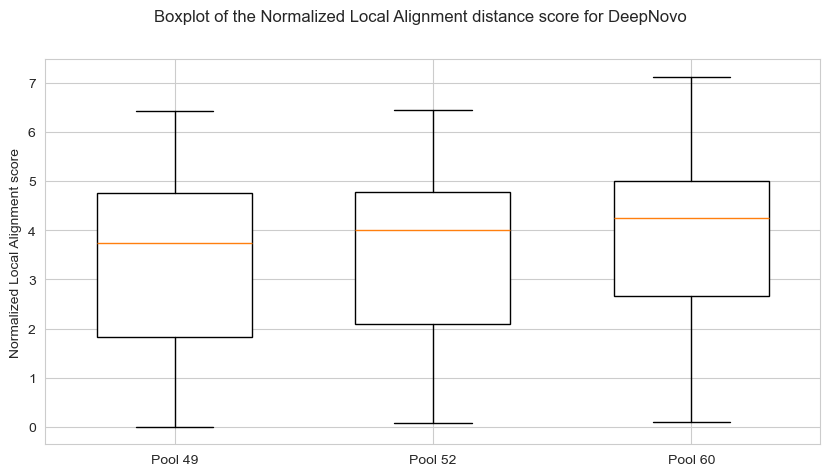

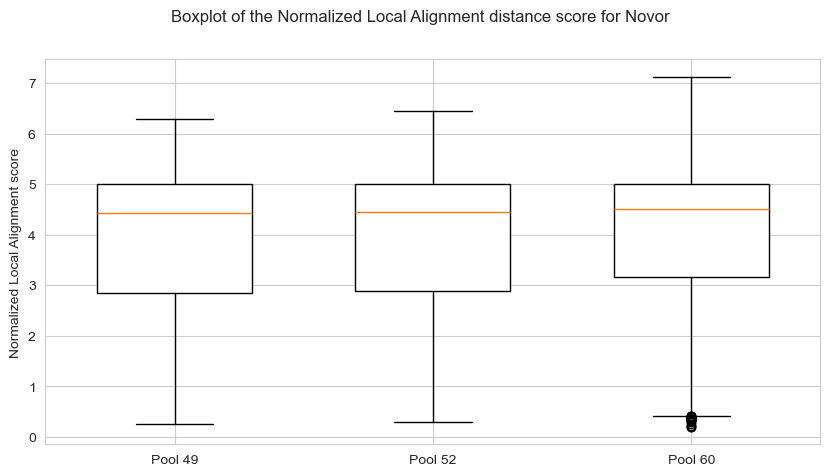

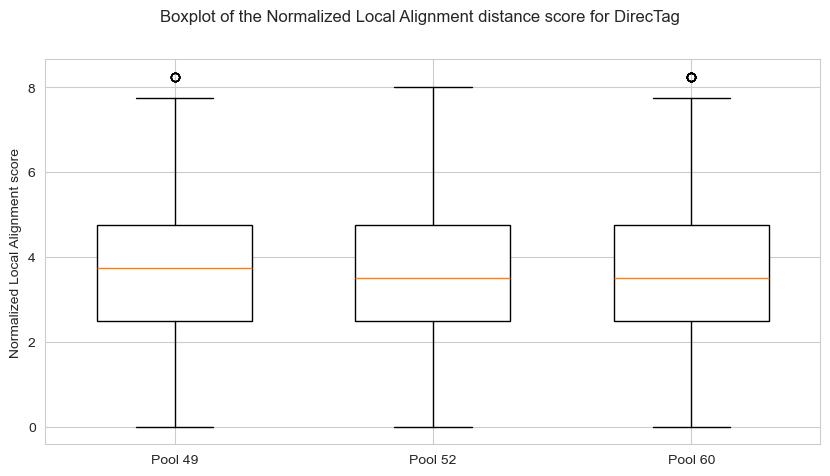

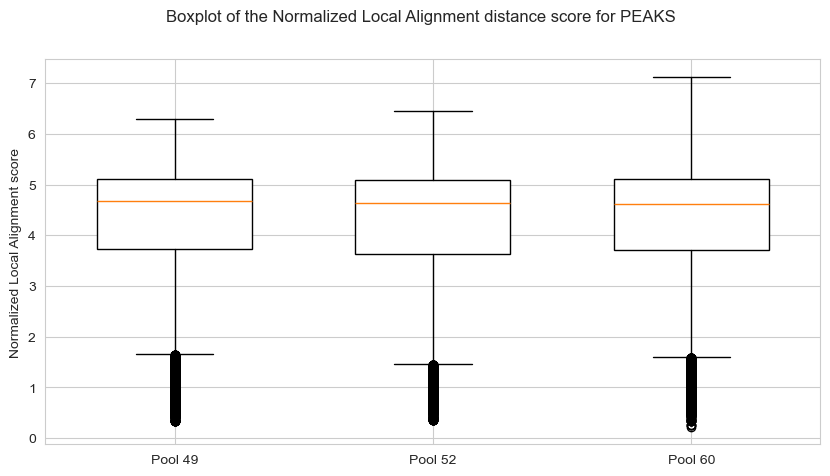

In [172]:
for alg, algFile in algorithms:


    fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True)
    fig.set_size_inches(10, 5)
    min_dict=dict()
    median_dict=dict()
    q1_dict=dict()
    q3_dict=dict()
    max_dict=dict()
    for pool in pools:
        # Load the data
        scored_data = pd.read_csv(f'../../Data/ScoringResults/{pool}/{algFile}_scored.tsv', sep='\t', index_col=0)

        # print boxplot of the identity score
        ax.boxplot(scored_data['Normalized Local Alignment'], positions=[pools.index(pool)], widths=0.6, patch_artist=True, boxprops=dict(facecolor='white'))
        median_dict[pool] = scored_data['Normalized Local Alignment'].median()
        q1_dict[pool] = scored_data['Normalized Local Alignment'].quantile(0.25)
        q3_dict[pool] = scored_data['Normalized Local Alignment'].quantile(0.75)
        max_dict[pool] = scored_data['Normalized Local Alignment'].max()
        min_dict[pool] = scored_data['Normalized Local Alignment'].min()

    ax.set_xticks(range(len(pools)))
    ax.set_ylabel('Normalized Local Alignment score')
    ax.set_xticklabels([' '.join(x.split('_')) for x in pools])
    print(alg+":")
    print(pd.DataFrame({'Pool':median_dict.keys(), 'Min':min_dict.values() , 'Q1': q1_dict.values(), 'Median': median_dict.values(), 'Q3': q3_dict.values(), 'Max': max_dict.values()}))
    # fig.tight_layout()
    fig.suptitle(f'Boxplot of the Normalized Local Alignment distance score for {alg}')
    #fig.savefig(f'../../Data/Analysis/{algFile}_all_pools_boxplot_levenshtein.png')


DeepNovo:
      Pool       Min        Q1    Median        Q3       Max
0  Pool_49 -1.133333  1.315789  3.400000  4.700000  6.428571
1  Pool_52 -1.470588  1.571429  3.642857  4.727273  6.444444
2  Pool_60 -1.333333  2.250000  4.166667  5.000000  7.125000
Novor:
      Pool       Min        Q1    Median   Q3       Max
0  Pool_49 -1.000000  2.400000  4.250000  5.0  6.285714
1  Pool_52 -1.555556  2.422065  4.250000  5.0  6.444444
2  Pool_60 -1.000000  2.750000  4.444444  5.0  7.125000
DirecTag:
      Pool       Min        Q1    Median        Q3       Max
0  Pool_49 -1.857143 -0.500000 -0.090909  0.333333  3.571429
1  Pool_52 -2.000000 -0.461538  0.000000  0.454545  2.625000
2  Pool_60 -1.777778 -0.444444  0.111111  0.750000  3.250000
PEAKS:
      Pool  Min        Q1    Median        Q3       Max
0  Pool_49 -1.0  3.250000  4.583333  5.090909  6.285714
1  Pool_52 -1.0  3.200000  4.529412  5.083333  6.444444
2  Pool_60 -1.0  3.222222  4.555556  5.111111  7.125000


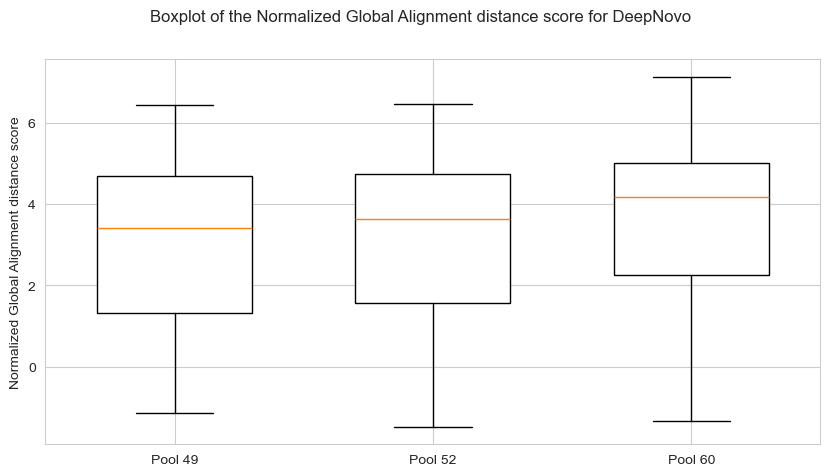

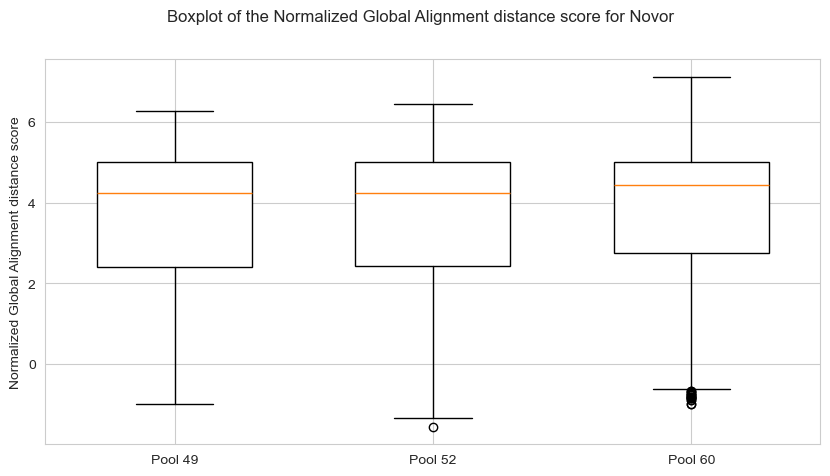

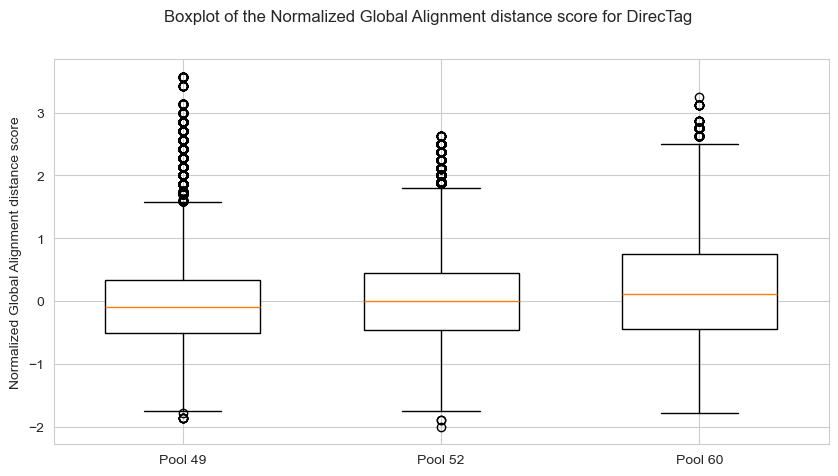

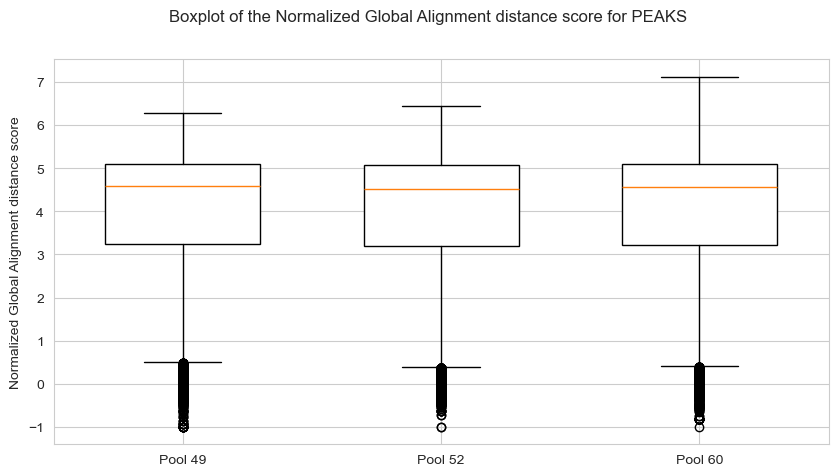

In [173]:
for alg, algFile in algorithms:


    fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True)
    fig.set_size_inches(10, 5)
    min_dict=dict()
    median_dict=dict()
    q1_dict=dict()
    q3_dict=dict()
    max_dict=dict()
    for pool in pools:
        # Load the data
        scored_data = pd.read_csv(f'../../Data/ScoringResults/{pool}/{algFile}_scored.tsv', sep='\t', index_col=0)

        # print boxplot of the identity score
        ax.boxplot(scored_data['Normalized Global Alignment'], positions=[pools.index(pool)], widths=0.6, patch_artist=True, boxprops=dict(facecolor='white'))
        median_dict[pool] = scored_data['Normalized Global Alignment'].median()
        q1_dict[pool] = scored_data['Normalized Global Alignment'].quantile(0.25)
        q3_dict[pool] = scored_data['Normalized Global Alignment'].quantile(0.75)
        max_dict[pool] = scored_data['Normalized Global Alignment'].max()
        min_dict[pool] = scored_data['Normalized Global Alignment'].min()

    ax.set_xticks(range(len(pools)))
    ax.set_ylabel('Normalized Global Alignment distance score')
    ax.set_xticklabels([' '.join(x.split('_')) for x in pools])
    print(alg+":")
    print(pd.DataFrame({'Pool':median_dict.keys(), 'Min':min_dict.values() , 'Q1': q1_dict.values(), 'Median': median_dict.values(), 'Q3': q3_dict.values(), 'Max': max_dict.values()}))
    # fig.tight_layout()
    fig.suptitle(f'Boxplot of the Normalized Global Alignment distance score for {alg}')
    #fig.savefig(f'../../Data/Analysis/{algFile}_all_pools_boxplot_levenshtein.png')
